# Linear Algebra with Numpy and Scipy

**Reference**: Chapter 1 of *Computational Nuclear Engineering and Radiological Science Using Python*, R. McClarren (2018)

## Learning Objectives
After studying this notebook, completing the activities, and asking questions in class, you should be able to:
* Create, manipulate, and use NumPy arrays
 * Explain scoping rules for arrays in Python
 * Perform element-wise and matrix operations with arrays
 * Access elements of an array with indices and slices
 * Iterate over elements of an array with for loops

## NumPy Arrays

So far, we have discussed lists, which are containers that hold any type of Python object such as strings, floats, integers, other lists, etc.

As engineers, we often want to store floating point numbers in vectors and matrices to perform linear algebra calculations. In this class, we will use **NumPy**. For a less engineering specific tutorial on NumPy, see https://docs.scipy.org/doc/numpy-1.15.0/user/quickstart.html

The basic unit in numpy is a multi-dimensional array:
* A one-dimensional (1-D) array is a **vector**
* A 2-D array is a **matrix**
* A 3-D array is a vector of matrices
* etc

### Getting Started

We'll start by loading the numpy module (a.k.a. library).

In [4]:
# Import the numpy module (a.k.a library) and give it the "nickname" np
# Warning: Do not modify this line. The autograde assumes numpy is loades as 'np'
import numpy as np

We can now write `np.` to call functions in the numpy library (a.k.a. module). You'll see we place a few standard import statements at the top of most notebooks in this class.

In [5]:
# Create a vector
a_vector = np.array([1,2,3,4])

# Create a matrix
a_matrix = np.array([(1,2,3),(4,5,6),(7,8,9)])

# Print to the screen
print("The vector",a_vector)
print("The matrix\n",a_matrix)

The vector [1 2 3 4]
The matrix
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


Arrays have several **attributes** that you can use to find out information regarding the array you're working with.

In [6]:
#shape tells you the shape
print("The shape of a_vector is ", a_vector.shape)
print("The shape of a_matrix is ", a_matrix.shape)

The shape of a_vector is  (4,)
The shape of a_matrix is  (3, 3)


In [7]:
#ndim tells you the dimensionality of an array
print("The dimension of a_vector is ", a_vector.ndim)
print("The dimension of a_matrix is ", a_matrix.ndim)

The dimension of a_vector is  1
The dimension of a_matrix is  2


In [8]:
#size is the total number of elements = 
#the product of the number of elements in each dimension
print("The size of a_vector is ", a_vector.size,"= ",
      a_vector.shape[0])
print("The size of a_matrix is ", a_matrix.size,"=",
      a_matrix.shape[0],"*",a_matrix.shape[1])

The size of a_vector is  4 =  4
The size of a_matrix is  9 = 3 * 3


Notice that `a_matrix.shape` is a list. We can access the number of rows with `a_matrix.shape[0]` and the number of columns with `a_matrix.shape[1]`.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Create the array shown below and store it in the variable <tt>my_array</tt>.
</div>

$$ A = \begin{bmatrix} 1 & 2 \\ 3 & 1 \\ 9 & 2 \end{bmatrix} $$

In [9]:
### BEGIN SOLUTION
my_array = np.array([[1,2],[3,1],[9,2]])
print(my_array)
### END SOLUTION

[[1 2]
 [3 1]
 [9 2]]


In [10]:
### BEGIN HIDDEN TESTS

my_answer = np.array([[1,2],[3,1],[9,2]])

assert np.shape(my_array) == (3,2), "Check the dimensions of your array."

for i in range(my_answer.shape[0]):
    for j in range(my_answer.shape[1]):
        assert my_answer[i,j] == my_array[i,j], "Check your array for row "+str(i+1)+" and column "+str(j+1)

### END HIDDEN TESTS

You can also re-size an array after you create it:

In [11]:
A = np.array([2,4,6,8])
print("A is now a vector",A,"\n")
A = A.reshape(2,2)
print("A is now a matrix\n",A)
print("\nNow let's shape A back to a vector")
print(A.reshape(4))

A is now a vector [2 4 6 8] 

A is now a matrix
 [[2 4]
 [6 8]]

Now let's shape A back to a vector
[2 4 6 8]


Notice how I needed to assign ``A`` with the reshaped array.  We'll talk more about this later. 

We can resize `my_array` by stacking the 1st row followed by the 2nd row followed by the 3rd row:

In [12]:
print("Before:")
print(my_array)

print("\nAfter stacking:")
print(my_array.reshape(6))

Before:
[[1 2]
 [3 1]
 [9 2]]

After stacking:
[1 2 3 1 9 2]


We can resize `my_array` by stacking the 2nd column under the first column.

In [13]:
my_array.reshape(6,order='F')

array([1, 3, 9, 2, 1, 2])

I want to highlight two things in the above example:
1. NumPy does not distinguish between a row vector and a column vector.
2. Specifying `order='F'` stacks by columns, which seems strange at first glance.

Regarding 2., a quick check of the documentation, https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html, reveals that `order='C'` is the default. Moreover, `'C'` if shorthand for C-style stacking and `'F'` if short for Fortan-style stacking. C and Fortran are two mature (read "old") and popular programming languages for scientific computing. They use different conventions for storing arrays in memory, which means different stacking styles. The main take away is, *why in doubt, peek at the documentation*.

### Creating Arrays in Neat Ways

The ``arange`` is a Numpy variant of the ``range`` we saw earlier. 

In [14]:
#let's make a vector from 0 to 2*pi in intervals of 0.1
dx = 0.1
X = np.arange(0,2*np.pi,dx)
print(X)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2]


Typically, however, the ``linspace`` function is actually what you want.

In [15]:
X = np.linspace(start = 0, stop = 2*np.pi, num = 62)
print(X)

[0.         0.10300304 0.20600608 0.30900911 0.41201215 0.51501519
 0.61801823 0.72102126 0.8240243  0.92702734 1.03003038 1.13303342
 1.23603645 1.33903949 1.44204253 1.54504557 1.64804861 1.75105164
 1.85405468 1.95705772 2.06006076 2.16306379 2.26606683 2.36906987
 2.47207291 2.57507595 2.67807898 2.78108202 2.88408506 2.9870881
 3.09009113 3.19309417 3.29609721 3.39910025 3.50210329 3.60510632
 3.70810936 3.8111124  3.91411544 4.01711848 4.12012151 4.22312455
 4.32612759 4.42913063 4.53213366 4.6351367  4.73813974 4.84114278
 4.94414582 5.04714885 5.15015189 5.25315493 5.35615797 5.459161
 5.56216404 5.66516708 5.76817012 5.87117316 5.97417619 6.07717923
 6.18018227 6.28318531]


Notice how it starts and ends exactly where I told it to.

If you want an array of zeros or ones, NumPy has a function for you.

In [16]:
zero_vector = np.zeros(10) #vector of length 10
zero_matrix = np.zeros((4,4)) #4 by 4 matrix
print("The zero vector:",zero_vector)
print("The zero matrix\n",zero_matrix)

The zero vector: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
The zero matrix
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [17]:
ones_vector = np.ones(10) #vector of length 10
ones_matrix = np.ones((4,4)) #4 by 4 matrix
print("The ones vector:",ones_vector)
print("The ones matrix\n",ones_matrix)

The ones vector: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The ones matrix
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Create a 6 by 5 matrix of zeros and store in variable <tt>zeros65</tt>
</div>

In [18]:
### BEGIN SOLUTION
zeros65 = np.zeros((6,5))
### END SOLUTION

In [19]:
### BEGIN HIDDEN TESTS

assert np.shape(zeros65) == (6,5), "Please check the dimensions."

assert np.array_equal(zeros65, np.zeros((6,5))), "Your array is not all zeros"
### END HIDDEN TESTS

You can also create an array with random entries between 0 and 1:

In [20]:
random_matrix = np.random.rand(2,3) #random 2 x 3 matrix
print("Here's a random 2 x 3 matrix\n",random_matrix)

print("\nAnother example")

#make a random array between two numbers
print(np.random.uniform(low=-5,high=6,size=(3,3)))

#make random integers

print("\nA third example")
print(np.random.randint(low=1,high=6,size=10))

Here's a random 2 x 3 matrix
 [[0.94875575 0.25466422 0.93693155]
 [0.96635427 0.41600105 0.79932228]]

Another example
[[ 1.81257083  4.12154316 -0.49858544]
 [ 5.1941563   3.91335452 -3.18464743]
 [ 4.09537986  2.175721    3.15271181]]

A third example
[2 2 2 2 4 2 2 4 3 2]


Finally, you may want to create an **identity matrix**:

In [21]:
#3 x 3 identity matrix
identity33 = np.identity(3)
print(identity33)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Read the documentation for <tt>vstack</tt> and <tt>hstack</tt>. Then create the following array in Python and store it in variable <tt>M</tt>. Hint: How can you use <tt>vstack</tt>, <tt>identity</tt>, and <tt>zeros</tt> together?
</div>

https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html

$$ M = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}$$

In [22]:
### BEGIN SOLUTION
M = np.vstack([np.identity(3), np.zeros(3)])
print(M)
### END SOLUTION

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [23]:
### BEGIN HIDDEN TESTS

assert np.shape(M) == (4,3)

for i in range(4):
    for j in range(3):
        if i == j:
            assert np.abs(M[i,j] - 1.0) < 1E-6, "Diagonal elements should be 1."
        else:
            assert np.abs(M[i,j]) < 1E-6, "Off diagonal elements should be zero."

### END HIDDEN TESTS

### Operations on Arrays

NumPy also defines arithmetic operations mostly in the way that you would expect.

In [24]:
#vector addition
x = np.ones(3) #3-vector of ones
y = 3*np.ones(3)-1 #3-vector of 2's
print(x,"+",y,"=",x+y)
print(x,"-",y,"=",x-y)

[1. 1. 1.] + [2. 2. 2.] = [3. 3. 3.]
[1. 1. 1.] - [2. 2. 2.] = [-1. -1. -1.]


Multiplication and division are **element-wise**, which may not be what you expect, but it is helpful.

In [25]:
x

array([1., 1., 1.])

In [26]:
y = np.array([1.0,2.0,3.0])
print(x,"*",y,"=",x*y)
print(x,"/",y,"=",x/y)

[1. 1. 1.] * [1. 2. 3.] = [1. 2. 3.]
[1. 1. 1.] / [1. 2. 3.] = [1.         0.5        0.33333333]


If you want the dot product, you have to use the ``dot`` function:

In [27]:
print(x,".",y,"=",np.dot(x,y))

[1. 1. 1.] . [1. 2. 3.] = 6.0


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Predict what will happen when you run the code below.
</div>

In [28]:
x = np.array([1,2.5,5])
y = np.array([4,6,7,9.0])
print(x+y)

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write a sentence with at least 50 characters describing why the behavor you observed makes sense. If it does not make sense, write out the question you will ask in class. Store your answer in the string <tt>my_answer</tt>.
</div>

In [29]:
my_answer = 'ehferbgrweavurebfvbidbv oisrevfbsrwiuevbgirwosgbvisbv . wefigwiuegfiuw'

In [30]:
### BEGIN HIDDEN TESTS
assert len(my_answer) > 50, "Your answer, a complete sentence, should be at least 50 characters long."
### END HIDDEN TESTS

Matrices work about the same way

In [31]:
silly_matrix = np.array([(1,2,3),(1,2,3),(1,2,3)])
print("The sum of\n",identity33,"\nand\n",
      silly_matrix,"\nis\n",identity33+silly_matrix)

The sum of
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
and
 [[1 2 3]
 [1 2 3]
 [1 2 3]] 
is
 [[2. 2. 3.]
 [1. 3. 3.]
 [1. 2. 4.]]


Multiplication and division are **element-wise**:

In [32]:
identity33 * silly_matrix

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [33]:
identity33 / silly_matrix

array([[1.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333]])

The ``dot`` function will give you the **matrix product**:

In [34]:
print("The matrix product of\n",identity33,
      "\nand\n",silly_matrix,"\nis\n",np.dot(identity33,silly_matrix))

The matrix product of
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 
and
 [[1 2 3]
 [1 2 3]
 [1 2 3]] 
is
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


In [35]:
#matrix times a vector
y = np.array([1.0,2.0,3.0])
print(silly_matrix,"times", y, "is")
print(np.dot(silly_matrix,y))

[[1 2 3]
 [1 2 3]
 [1 2 3]] times [1. 2. 3.] is
[14. 14. 14.]


Writing `np.dot` can get tedious. You can also use the `@` symbol for matrix multiplication:

In [36]:
print(silly_matrix @ y)

[14. 14. 14.]


### Universal Functions

NumPy also provides universal functions that operate on each element of an array.  Common mathematical functions are defined in this way.

In [37]:
#recall we defined X as a linspace from 0 to 2pi
print(X)

# Print an empty line
print("\n")

#taking the sin(X) should be one whole sine wave
print(np.sin(X))

[0.         0.10300304 0.20600608 0.30900911 0.41201215 0.51501519
 0.61801823 0.72102126 0.8240243  0.92702734 1.03003038 1.13303342
 1.23603645 1.33903949 1.44204253 1.54504557 1.64804861 1.75105164
 1.85405468 1.95705772 2.06006076 2.16306379 2.26606683 2.36906987
 2.47207291 2.57507595 2.67807898 2.78108202 2.88408506 2.9870881
 3.09009113 3.19309417 3.29609721 3.39910025 3.50210329 3.60510632
 3.70810936 3.8111124  3.91411544 4.01711848 4.12012151 4.22312455
 4.32612759 4.42913063 4.53213366 4.6351367  4.73813974 4.84114278
 4.94414582 5.04714885 5.15015189 5.25315493 5.35615797 5.459161
 5.56216404 5.66516708 5.76817012 5.87117316 5.97417619 6.07717923
 6.18018227 6.28318531]


[ 0.00000000e+00  1.02820997e-01  2.04552066e-01  3.04114832e-01
  4.00453906e-01  4.92548068e-01  5.79421098e-01  6.60152121e-01
  7.33885366e-01  7.99839245e-01  8.57314628e-01  9.05702263e-01
  9.44489229e-01  9.73264374e-01  9.91722674e-01  9.99668468e-01
  9.97017526e-01  9.83797952e-01  9.60149874e-0

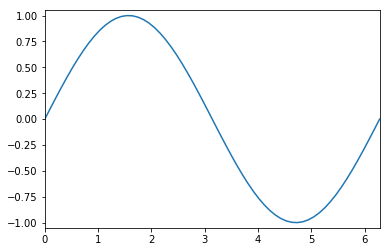

In [38]:
import matplotlib.pyplot as plt

#the next line is only needed in iPython notebooks
%matplotlib inline

# Create a plot. We'll learn more about this below
plt.plot(X,np.sin(X));
plt.axis([0,2*np.pi,-1.05,1.05])
plt.show()

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Copy the code from above to below. Then modify to plot cosine instead of sine.
</div>

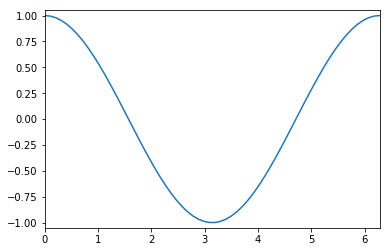

In [39]:
import matplotlib.pyplot as plt

#the next line is only needed in iPython notebooks
%matplotlib inline

# Create a plot. We'll learn more about this below
plt.plot(X,np.cos(X));
plt.axis([0,2*np.pi,-1.05,1.05])
plt.show()

### Copying Arrays

When you assign a new variable name to an existing array, it is the same as giving two names for the object.

In [40]:
a = np.array([1.0,2,3,4,5,6])
print(a)
b = a # this will make a and b different names for the same array
b[2] = 2.56 #change b at position 2, also changes a
print("The value of array a is",a)
print("The value of array b is",b)

[1. 2. 3. 4. 5. 6.]
The value of array a is [1.   2.   2.56 4.   5.   6.  ]
The value of array b is [1.   2.   2.56 4.   5.   6.  ]


**Warning to MATLAB users:** MATLAB would not change `a` with the assignment `b[2] = 2.56`. Python and MATLAB behave differently in this respect.

When you pass an array to a function, the **function does not copy the array**, it just assigns that array another name as in the previous example.

In [41]:
a1 = ["apples","oranges"]
b1 = a1
b1[1] = "grapes"
print(a1)
print(b1)

['apples', 'grapes']
['apples', 'grapes']


In [42]:
def devious_function(func_array):
    func_array[0] = -1.0e6 #changes the value of array passed in

a = np.array([1.0,2,3,4,5,6])
print("Before the function a =",a)
devious_function(a)
print("After the function a =",a)

Before the function a = [1. 2. 3. 4. 5. 6.]
After the function a = [-1.e+06  2.e+00  3.e+00  4.e+00  5.e+00  6.e+00]


In [43]:
def less_devious_function(func_float):
    func_float = 9.9 #changes local copy of func_float
a = 1
print("Before the function a =",a)
less_devious_function(a)
print("After the function a =",a)

Before the function a = 1
After the function a = 1


This is different than what we saw previously for passing floats, integers, booleans, and strings to functions. 

*Why would Python do this, besides to just confuse me!?!* you ask.

Imagine a NumPy array has millions of elements. It is best for efficient memory usage if functions do not make multiple copies of millions of elements.

**Summary:**
* Floats, integers, booleans, strings: You do NOT need to worry about `.copy()`. These are called primative types in Python.
* Lists, arrays, dictionaries, and anything else. You need to worry about `.copy()`.

To make a real copy of the entire elements of an array you need to use the ``copy`` function on the array.

In [44]:
a = np.array([1.0,2,3,4,5,6])
print(a)
#this will make a and b different copies for the same array
b = a.copy()
b[2] = 2.56 #change b at position 2, will not change a
print("\nThe value of array a is",a)
print("\nThe value of array b is",b)

[1. 2. 3. 4. 5. 6.]

The value of array a is [1. 2. 3. 4. 5. 6.]

The value of array b is [1.   2.   2.56 4.   5.   6.  ]


### Indexing, Slicing, and Iterating

Oftentimes we'll want to access more than one element of an array at a time.  We can do this by slicing.

In [45]:
#bring these guys back
import numpy as np
a_vector = np.array([1,2,3,4])
a_matrix = np.array([(1,2,3),(4,5,6),(7,8,9)])
print("The vector",a_vector)
print("\nThe matrix\n",a_matrix)
print("\na_vector[:] =",a_vector[:]) #single colon gives everything
print("\na_vector[1:3] =",a_vector[1:3]) #print out position 1 to position 2 (same as for lists)
print("\nFor a matrix, we can slice in each dimension")
print("a_matrix[0,:] =",a_matrix[0,:]) #every column in row 0
print("a_matrix[0,1:3] =",a_matrix[0,1:3]) #columns 1 and 2 in row 0
print("a_matrix[:,2] =",a_matrix[:,2]) #every row in column 2

The vector [1 2 3 4]

The matrix
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

a_vector[:] = [1 2 3 4]

a_vector[1:3] = [2 3]

For a matrix, we can slice in each dimension
a_matrix[0,:] = [1 2 3]
a_matrix[0,1:3] = [2 3]
a_matrix[:,2] = [3 6 9]


Iteration over a matrix will give you everything in a row:

In [46]:
a_matrix = np.array([(1,2,3),(4,5,6),(7,8,9)])
count = 0
for i in a_matrix:
    print("Row",count,"of a_matrix is",i)
    count += 1
    
    
for column in a_matrix.transpose():
    print("Column",count,"of a_matrix is",column)
    count += 1

Row 0 of a_matrix is [1 2 3]
Row 1 of a_matrix is [4 5 6]
Row 2 of a_matrix is [7 8 9]
Column 3 of a_matrix is [1 4 7]
Column 4 of a_matrix is [2 5 8]
Column 5 of a_matrix is [3 6 9]


To iterate over every element in the matrix you'll need two for loops:

In [47]:
a_matrix = np.array([(1,2,3),(4,5,6),(7,8,9)])
row_count = 0
col_count = 0
for row in a_matrix:
    col_count = 0
    for col in row:
        print("Row",row_count,"Column",col_count,"of a_matrix is",col)
        col_count += 1
    row_count += 1

Row 0 Column 0 of a_matrix is 1
Row 0 Column 1 of a_matrix is 2
Row 0 Column 2 of a_matrix is 3
Row 1 Column 0 of a_matrix is 4
Row 1 Column 1 of a_matrix is 5
Row 1 Column 2 of a_matrix is 6
Row 2 Column 0 of a_matrix is 7
Row 2 Column 1 of a_matrix is 8
Row 2 Column 2 of a_matrix is 9


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Using a single for loop, print the diagonal elements of matrix <tt>A</tt>. Store the diagonal elements in the list <tt>diagonal</tt>.
</div>

Tip: Let `my_list` be a Python list. Remember that `my_list.append(1.0)` will add `1.0` to the list `my_list`.

In [48]:
N = 3
A = np.random.rand(N,N)
print("A =\n",A)

# create any empty list
diagonal = []

#print the diagonal of the matrix using a single for loop
print("\nThe diagonal elements of A")

### BEGIN SOLUTION
for i in range(N):
    diagonal.append(A[i,i])
    print(A[i,i])
### END SOLUTION

A =
 [[0.98530512 0.04869325 0.82686032]
 [0.401906   0.91142412 0.29288514]
 [0.00861273 0.95496269 0.68612047]]

The diagonal elements of A
0.9853051241512321
0.9114241226071109
0.6861204674649746


Warning: You need to programmically extract the diagonals. You cannot manually copy them. When the autograder runs, it will generate a new `A` matrix.

In [49]:
### BEGIN HIDDEN TESTS
assert len(diagonal) == 3, "Expecting list 'diagonals' to have 3 elements."

for i in range(N):
    assert np.abs(diagonal[i] - A[i,i]) < 1E-10, "Check the diagonal for row and column "+str(i)+". Remember Python starts counting at 0."
### END HIDDEN TESTS

NumPy also has a built-in function to extract the diagonal of a matrix.

In [50]:
print("\nThe diagonal of A as a vector")
print(np.diag(A))


The diagonal of A as a vector
[0.98530512 0.91142412 0.68612047]


### Complex Numbers
Numpy can handle complex numbers, but you need to tell it that you have complex numbers by adding a parameter to the function that creates your array (or matrix, or vector, etc.).

In [51]:
cArray = np.zeros(5, dtype="complex")
print(cArray)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


``dtype`` tells NumPy that the array will hold complex numbers. It is not needed if it is obvious you are using complex numbers.

In [52]:
cArray2 = np.array([1+1j,-1])
print(cArray2)

[ 1.+1.j -1.+0.j]


You must be careful when you manipulate an array of floats into complex numbers, say by taking the square root

In [53]:
fArray = np.array([-1,1])
print("Wrong way gives", np.sqrt(fArray))

Wrong way gives [nan  1.]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [54]:
print("Right way gives", np.sqrt(fArray, dtype="complex"))

Right way gives [0.+1.j 1.+0.j]


### Integrating Everything Together

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity [handout]</b>: With a partner, predict the output of Python code.
</div>

In [55]:
### BEGIN SOLUTION

x = 1
A = np.array([[1, 3], [2, 4]])
print("A=\n",A)
B = np.array([5, 6, 7])
print("\nB=\n",B,"\n")

def function1(B,x,s):
    ''' How well do you know Python scoping and indexing rules?
    Predict the output of the code below and discuss with a partner.
    
    Arguments:
        B: Numpy array
        x: scalar integer
        s: string
    
    Returns:
        C: Numpy array
    
    '''
    B[0:2] = A[:,1]
    C = B.copy()
    C[1] = x
    x = A[1,1]
    print(s[-4:-1])
    print(s[-4:])
    return C

C = function1(B, 9, "Hello World!")

print("\n x = ",x,"\n")
print("\nB = \n",B)
print("\nC = \n",C)

### END SOLUTION

A=
 [[1 3]
 [2 4]]

B=
 [5 6 7] 

rld
rld!

 x =  1 


B = 
 [3 4 7]

C = 
 [3 9 7]


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, create a Python function that does the following:
</div>

* Takes the size of a matrix, $N$, as the input. Rounds to an integer.
* If $N < 1$, prints a warning message and returns nothing. Otherwise, continues.
* Generates a matrix of size $N \times N$ filled with random floating point numbers from -5 to 5
* Print the matrix to the screen
* Returns a vector that is the sum of the columns of the matrix

In [56]:
def np_activity(N):
    '''Generates a random N x N matrix, prints to screen,
    and returns a vector that is the sum of the columns.
    
    Arguments:
        YOU NEED TO FILL THIS IN
    
    Returns:
        YOU NEED TO FILL THIS IN
    '''

Discussion Question: what would we need to change to access the matrix we created outside our function?